In [32]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
import datetime as dt 
import time

In [33]:
df_train = pd.read_csv('train.csv',parse_dates=['date'])
df_train.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [34]:
df_train.shape

(913000, 4)

In [35]:
df_train.isnull().any().sum()

0

No null values in the dataset

In [36]:
df_train.store.value_counts()

1     91300
2     91300
3     91300
4     91300
5     91300
6     91300
7     91300
8     91300
9     91300
10    91300
Name: store, dtype: int64

In [37]:
df_train.item.value_counts()

1     18260
38    18260
28    18260
29    18260
30    18260
31    18260
32    18260
33    18260
34    18260
35    18260
36    18260
37    18260
39    18260
2     18260
40    18260
41    18260
42    18260
43    18260
44    18260
45    18260
46    18260
47    18260
48    18260
49    18260
27    18260
26    18260
25    18260
24    18260
3     18260
4     18260
5     18260
6     18260
7     18260
8     18260
9     18260
10    18260
11    18260
12    18260
13    18260
14    18260
15    18260
16    18260
17    18260
18    18260
19    18260
20    18260
21    18260
22    18260
23    18260
50    18260
Name: item, dtype: int64

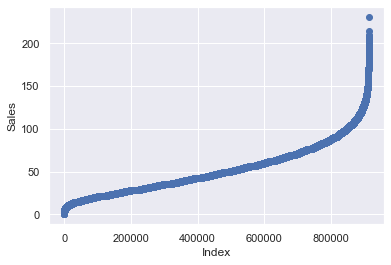

In [38]:
sns.set()
plt.scatter(range(len(df_train.sales)),df_train.sales.sort_values())
plt.ylabel('Sales')
plt.xlabel('Index')
plt.show()

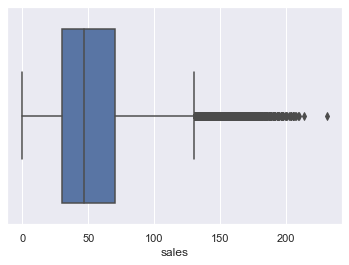

In [39]:
sns.boxplot(x='sales',data=df_train)
plt.show()

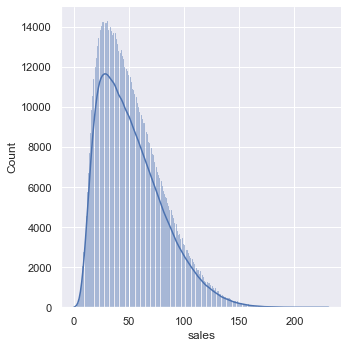

In [40]:
sns.displot(x='sales',data=df_train,kind='hist',kde=True)
plt.show()

The target variable is positively skewed

In [41]:
avg_sales_hist = df_train.groupby(['item']).agg({'sales':'mean'}).sort_values('sales',ascending=False)
avg_sales_hist

,sales
item,
15,88.030778
28,87.881325
13,84.316594
18,84.275794
25,80.686418
45,80.584173
38,80.521906
22,80.502245
36,77.028916


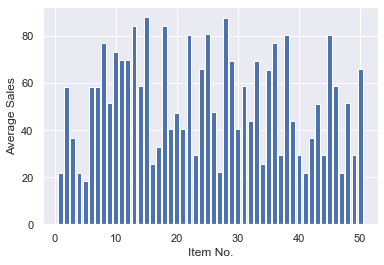

In [42]:
plt.bar(avg_sales_hist.index,avg_sales_hist.sales)
plt.xlabel('Item No.')
plt.ylabel('Average Sales')
plt.show()

In [49]:
def date_features(df):
    dataset = df.copy(deep=True)
    # Date Features
    df['year'] = dataset.date.dt.year
    df['month'] = dataset.date.dt.month
    df['day'] = dataset.date.dt.day
    df['dayofyear'] = dataset.date.dt.day_of_year
    df['dayofweek'] = dataset.date.dt.dayofweek
    df['weekofyear'] = dataset.date.dt.weekofyear
    
    # Additionnal Data Features
    df['day^year'] = np.log((np.log(dataset['dayofyear'] + 1)) ** (dataset['year'] - 2000))
    
    # Drop date
    df.drop('date', axis=1, inplace=True)
    
    return df

# Dates Features for Train, Test
train = date_features(df_train)

C:\Users\nisha\anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':


KeyError: 'dayofyear'

In [46]:
df_train.date.dt.dayofyear

0           1
1           2
2           3
3           4
4           5
         ... 
912995    361
912996    362
912997    363
912998    364
912999    365
Name: date, Length: 913000, dtype: int64